# SMEND CONSULTS Sentiment Analysis on Climate Change Predict.
© Explore Data Science Academy

# The Team
 1. Sodiq Ambali - Team lead
 2. Eteng Uket
 3. Nichodemus Amollo
 4. Michael Omosebi
 5. Dorcas Solonka

# Climate Change Belief Analysis 2022

### Overview: Predict an individual’s belief in climate change based on historical tweet data.
   
- Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. 

## Problem Statement
#### In this project we would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to companies market research efforts in gauging how their product/service may be received.

### Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

### Sentiment of tweet Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

In [49]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="pZRIYy5yWLxOVTSX7gAbXSwXX",
    project_name="climate-change-belief-analysis",
    workspace="sodiq-olamide")

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sodiq-olamide/climate-change-belief-analysis/f531868f658a4c12a08fa11b577c429b
COMET INFO:   Parameters:
COMET INFO:     algorithm     : auto
COMET INFO:     leaf_size     : 30
COMET INFO:     metric        : minkowski
COMET INFO:     metric_params : 1
COMET INFO:     n_jobs        : 1
COMET INFO:     n_neighbors   : 6
COMET INFO:     norm          : l2
COMET INFO:     p             : 2
COMET INFO:     radius        : 1.0
COMET INFO:     smooth_idf    : True
COMET INFO:     sublinear_tf  : False
COMET INFO:     use_idf       : True
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
C

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

#### For any Machine Learning projects certain python packages must be imported in order to carry out the task.
### Below contains all package necessary for predicting individuals beliefs in climate change.

In [50]:
#NumPy can be used to perform a wide variety of mathematical operations on arrays
import numpy as np
#Pandas is used for working with data sets.It has functions for analyzing, cleaning, exploring, and manipulating data.
import pandas as pd
from pandas import MultiIndex

#Below are comprehensive libraries for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import seaborn as sns
from wordcloud import WordCloud
from plotly import graph_objects as go
# set plot style
sns.set()
#Regular Expression used for data cleaning
import re

#Text processing packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

#Model evaluation packages
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, precision_score,  recall_score

#Packages to split the data for testing and training
from sklearn.model_selection import train_test_split

#Packages for features selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Modelling Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
#
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

#Imbalanced data processing packages
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTEENN, SMOTETomek

#from sklearn.pipeline import make_pipeline


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we to load the data file's into a DataFrame. |

---

 In predicting Individuals beliefs in climate change based on historical data, supervised classification techniques must be performed, here for we must load in the training dataset for training the classifier model's and test dataset for predicting the result of the trained model's.

In [51]:
#Load the tweet dataset into a dataframe
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

The training dataset is stored in a variable named train_df, while the test dataset is stored in test_df

The next and one of the most important process is to perform an EDA, that is Exploratory Data Analysis, which involves analyzing the training dataset in other to derive meaningful insights about the data.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we perform an in-depth analysis of all the variables in the DataFrame. |

---


Getting a view of our training dataset.

In [52]:
#Viewing the dataframe.
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


Get feature name and their types - to check for missing values.

In [53]:
## getting feature name and their types - to check for missing values
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
None


Both sentiment and tweet id are numerical columns with an Integer datatype. The message column is object type. There are 15819 values in each column, which confirms there is no missing value.

#### Further check for null values

In [54]:
## NULL values in the data
print ("Null Value Statistics:", '\n',train_df.isnull().sum()) ## Sum will tell the total number of NULL values inside the dataset

Null Value Statistics: 
 sentiment    0
message      0
tweetid      0
dtype: int64


The data is complete - no column has missing values in the dataset.

Get the shape of the data to understand the number of observations in the dataset.

In [55]:
## 6) shape of data
print("Shape of Data : \n", train_df.shape, "\n")
print("No. of rows in the data = ", train_df.shape[0])
print("No. of columns in the data = ", train_df.shape[1])

Shape of Data : 
 (15819, 3) 

No. of rows in the data =  15819
No. of columns in the data =  3


The historical train dataset contains 15819 rows and 3 columns.

#### Distribution of tweets by sentiment

In [56]:
# see statistics for categorical features
print("See distribution of messages per sentiment : ")
count = train_df.groupby("sentiment").count()["message"].reset_index().sort_values(by="message", ascending=False)
count.style.background_gradient(cmap="Purples")

See distribution of messages per sentiment : 


,sentiment,message
2,1,8530
3,2,3640
1,0,2353
0,-1,1296


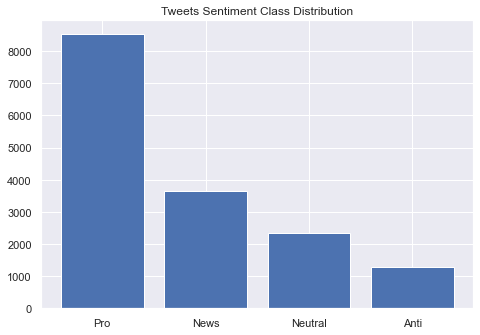

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sclass = ['Pro', 'News', 'Neutral', 'Anti']
counts = [8530, 3640, 2353, 1296]
ax.bar(Sclass,counts)
plt.title('Tweets Sentiment Class Distribution')
plt.show()

1 Pro tweets: the number of tweets that support the belief of man-made climate change 8530.

2 News: the number of tweets that link to factual news about climate change are 3640

0 Neutral: the number of tweets that neither support nor refute the belief of man-made climate change are 2353

-1 Anti: the number of tweets that does not believe in man-made climate change are 1296

Getting Statistics for the Non -Numerical column.

In [58]:
## see statistics for non- numerical features
print("See statistics for non- numerical columns : ")
train_df.groupby('sentiment').describe(include=['object'])

See statistics for non- numerical columns : 


message                                                            \
            count unique                                                top   
sentiment                                                                     
-1           1296   1222  RT @realDonaldTrump: The concept of global war...   
 0           2353   2245  RT @ULTRAVlOLENCE: Interviewer: 'What do you t...   
 1           8530   7224  RT @StephenSchlegel: she's thinking about how ...   
 2           3640   3542  RT @business: China tells Trump climate change...   

                
          freq  
sentiment       
-1          22  
 0          20  
 1         307  
 2          12

Out of all tweets, there are a total of 14229 unique tweets. the most common tweet for Pro Tweet sentiment Class is "RT @StephenSchlegel: she's thinking about how...". it occurs 307 times.

Visualizing the distribution tweets by Sentiments.

In [59]:
fig = go.Figure(go.Funnel(
    y = ["Pro","News", "Nuetral", "Anti"],
    x = train_df.sentiment.value_counts(normalize = True) * 100
    ))
fig.show()

Ohh we can see from the above plot that our training data contains an uneven distributions of data between the sentiment classes.

Pro tweets occupy 53.92% of the total tweets.

News tweets occupy 23.02% of the total tweets.

Neutral tweets occupy 14.87% of the total tweets.

Anti tweets occupy 8.19% of the total tweets.


It clear that more than half of the tweets samples supports the beliefs of man-made climate change, while very few tweet sample does not believe in man-made climate change.

Viewing an Entire length of message feature in the tweet dataframe, so as to find patterns on how most tweet messages are typed.

In [60]:
print('Show the full_text of 10 tweets: ')
for tweet in train_df['message'][100:110]:
    print(tweet)

Show the full_text of 10 tweets: 
So we have a director of EPA who is a climate change denier. No a coal lobbies to as deputy EPA Chief. Environment… https://t.co/XlxHbWNJuM
RT @IrisRimon: The Chinese just broke massive iceberg in Antarctica as part of their global warming hoax.
RT @thinkprogress: Where are Rex Tillerson’s climate change emails?
https://t.co/LyANHBPZfT
RT @M3thG0d: If global warming isn't real why did club penguin shut down
RT @NDeNicolaMD: 500,000 doctors agree: climate change is making us sick #EarthDay #MarchForScience #HealthAndClimate…
RT @tristinc1: our president think climate change is a hoax made by the chinese &amp; our vice president thinks being gay is a curable disease.Ã¢â‚¬Â¦
80% of GHG via resevoirs are methane. Resevoirs play a substantial role in global warming. https://t.co/CNHiU818Ky https://t.co/58nmAFxcmP
RT @Fruitloopian: Why is there snow in March if we have global warming?
RT @GreenHarvard: “Universities have a uniquely important role to play in 

Alright... Progress, we can now easily see a subset of full_text in every row of the train dataset column titled message.

Checking the tweetid column

In [61]:
train_df['tweetid'].value_counts()

625221    1
384830    1
623300    1
245730    1
585862    1
         ..
594855    1
746460    1
856075    1
358459    1
806319    1
Name: tweetid, Length: 15819, dtype: int64

From the result above, each tweetid is unique, meaning it does not repeat.

#### Getting More Information through visualization.

In [62]:
full_text = " ".join(train_df['message'])

We joined the entire message column in the train dataset, so has to be able to get the most reoccurring word or words in the data

#### Visualizing the most reoccuring words with Word Cloud

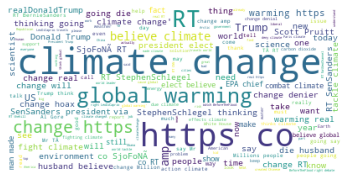

In [63]:
wc = WordCloud(background_color='white')
img = wc.generate(full_text)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()


The Most repeated words in the tweet message are:

    . Climate, Change, Global, Warming, Change, https, RT, Today, CO e.t.c. 

Now Lets get the Common words based on each tweet Sentiment.

First we groupby tweets Sentiment.

In [64]:
gb = train_df.groupby('sentiment')

Now lets get sentiments from each groups

In [65]:
Anti = "".join(gb.get_group(-1)['message'])
Neutral = "".join(gb.get_group(0)['message'])
Pro = "".join(gb.get_group(1)['message'])
News = "".join(gb.get_group(2)['message'])

ANTI Climate Change

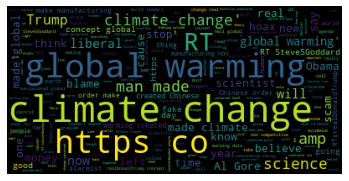

In [66]:
wc = WordCloud(background_color='black')
img = wc.generate(Anti)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()

The Most repeated words in the Anti Sentiment class are:

climate, change, scientist, global, warming, e.t.c

NEUTRAL Climate Change

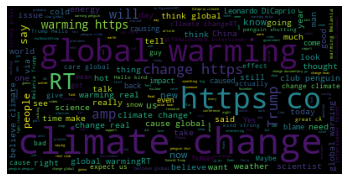

In [67]:
wc = WordCloud(background_color='black')
img = wc.generate(Neutral)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()

The Most repeated words in the Neutral Sentiment class are:

climate, change, global, warming, e.t.c

Pro Climate Change

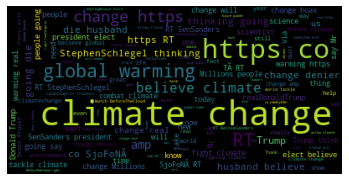

In [68]:
wc = WordCloud(background_color='black')
img = wc.generate(Pro)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()

The Most repeated words in the Pro Sentiment class are:

climate, change, global, warming, e.t.c

Factual News Climate Change

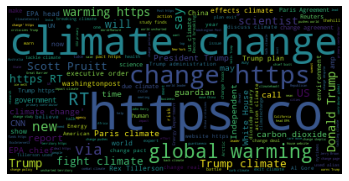

In [69]:
wc = WordCloud(background_color='black')
img = wc.generate(News)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()

The Most repeated words in the Factual News Sentiment class are:

climate, change, global, warming, trump, e.t.c

Before finalizing the Exploratory data analysis, 

Lets see how sentiment class reacts to climate change through their tweets.

Anti Sentiment Class

In [70]:
print('Show the full_text of 5 Anti Sentiment Class tweets: ')
for tweet in gb.get_group(-1)['message'][100:105]:
    print(tweet)

Show the full_text of 5 Anti Sentiment Class tweets: 
@rambogooner The people saying “don’t look at the sun” are the same people who say climate change is real — and we all know that’s a lie.
RT @TheFoundingSon: NOAA scientists manipulated temperature data to make global warming seem worse

Who's surprised? Not me
https://t.co/Rj…
RT @GeorgiaLogCabin: NOAA's global warming data manipulation https://t.co/flujjaaWUR #Economy #National
It's really not about science at all, but religious fundamentalism of the climate change cult. With a sprinkling of… https://t.co/vV8L1zTsGq
RT @MarkACollett: The biggest threat to the environment isn't global warming, it's overpopulation that is fuelled by liberal aid to the thi…


#### From the above, Anti Sentiment class mostly believes global climate change is not real, but a manipulatory agenda by the government.

Neutral Sentiment Class

In [71]:
print('Show the full_text of 5 Anti Sentiment Class tweets: ')
for tweet in gb.get_group(0)['message'][1000:1005]:
    print(tweet)

Show the full_text of 5 Anti Sentiment Class tweets: 
RT @superlativemaui: climate change, healthcare, taxes, alzheimer's, supreme court, race and Ã°Å¸ï†Â³Ã¯Â¸ï†Ã¢â‚¬ï†Ã°Å¸Å’Ë† equality, immigration, policing, war, worÃ¢â‚¬Â¦
#Trumpland .. next, you'll be blaming him for climate change?! Fuck off you reprehensible creature https://t.co/ynLk5jQZ9J
Making the environment great again...Trump's environment chief says CO2 not main cause of global warming https://t.co/D0KBxKCkjr
Why do we have to make a deal to do OUR part for climate change? Why can't everyone just do their part for our planet?
@ValentinoKhan i always start my conversations talking about global warming, it's a real ice-breaker! High five! 🖐


The Neutral sentiments class are always neutral, they 

Pro Sentiment Class

In [72]:
print('Show the full_text of 5 Anti Sentiment Class tweets: ')
for tweet in gb.get_group(1)['message'][100:105]:
    print(tweet)

Show the full_text of 5 Anti Sentiment Class tweets: 
#SDG13 is a call to take urgent action to combat #climate change and its impacts. Join the movement:Ã¢â‚¬Â¦ https://t.co/BqxZ5ZkBjv
RT @bradleym4: @JuddLegum Me (to my 14 yo kid): do you believe in climate change?
Kid: It's a scientific fact, so it doesn't matte…
RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
When China calls out Donald Trump on climate change, you know itÃ¢â‚¬â„¢s bad https://t.co/ukXyPvuvJf
RT @billmckibben: 'ExxonMobil has a long history of peddling misinformation on climate change.' @elizkolbert in @NewYorker #ExxonKnew https…


#### The Pro Sentiment class are mostly Climate Change Activist, they have a do die altitude in respect to governmental involvement on climate changes.

News Sentiment Class

In [73]:
print('Show the full_text of 5 Anti Sentiment Class tweets: ')
for tweet in gb.get_group(2)['message'][100:105]:
    print(tweet)

Show the full_text of 5 Anti Sentiment Class tweets: 
RT @Wine_Newz: The #Wine industry in #Europe could be in trouble due to global warming, researchers warn https://t.co/1LErjnPpMI
Trump really doesn't want to face these 21 kids on climate change https://t.co/oHfhg9Gz1O https://t.co/ExhoFHE2KQ
RT @aggyk: Five Pacific islands lost to rising seas as climate change hits https://t.co/kmnBmFANdw
NASA is defiantly communicating climate change science despite Trump’s doubts' https://t.co/E3qtwWYV3Z  @NASAClimate Lift ‘em up, y’all!
RT @Fusion: Peru is suffering its worst floods in recent history—and some scientists say global warming is to blame: https://t.co/3EGbsYVNJq


#### The Factual News sentiment class are mostly inquisitive, they like to get factual news consigning climate change.

### Key Insights

 A- Message Column contains stopwords and, unimportant words like:

     1. RT,
     2. #,
     3. @
     4. https: links
     5. emoji's 
     6. ( )
     7. +
     8. !~ "" 

 B- The Dataset Comprises of Unbalanced Data

 C- Giving that "tweetid" comprises of unique values, it will be   non-relevant in the analysis, therefore might not be used for modelling.

Having derived certain insights from the data, the next step is to perform data engineering....

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### Given that our datasets contains a non_numerical column certain preprocessing steps must be carried out, which involves:

    . Letter casing: Converting all letters to either upper case or lower case.
    . Tokenizing: Turning the tweets into tokens. Tokens are words separated by spaces in a text.
    . Noise removal: Eliminating unwanted characters, such as HTML tags, punctuation marks, special characters, white spaces etc.
    . Stopwords removal: Some words do not contribute much to the machine learning model, so it's good to remove them. A list of stopwords can be defined by the nltk library, or it can be business-specific.
    . Stemming: Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from a word in order to obtain a word stem. Porter Stemmer is the most widely used technique because it is very fast. Generally, stemming chops off end of the word, and mostly it works fine.
    OR
    . Lemmatization: the process of reducing the different forms of a word to one single form, for example, reducing "builds", "building", or "built" to the lemma.


!!!! Before we begin any preprocessing steps, lets recall both the training and test dataset.

In [74]:
print(train_df.head(), test_df.head())

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954                                              message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \r\nPu...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928


let just have a view of the rows and columns.

In [75]:
print(train_df.shape, test_df.shape)

(15819, 3) (10546, 2)


Now lets now preprocess the dataset, by creating a function that cleans, transforms and lemmatize the words in the dataset.

In [76]:
def preprocess(text):
    """This function takes in pandas dataframe, removes URL hyperlinks, stopwords, punctuation noises, and lemmatize the text."""

    tokenizer = TreebankWordTokenizer() 
    lemmatizer = WordNetLemmatizer()
    stopwords_list = stopwords.words('english')
    point_noise = string.punctuation + '0123456789'
    
    cleanText = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', "", text) #Removing URLs...
    cleanText = re.sub(r'@[a-zA-Z0-9\_\w]+', '', cleanText)#Remove @mentions
    cleanText = re.sub(r'#[a-zA-Z0-9]+', '', cleanText) #Remove '#' symbols
    cleanText = re.sub(r'RT', '', cleanText)#Remove RT from text
    cleanText = cleanText.lower() #Lowering case
    cleanText = re.sub(r'([https][http][htt][th][ht])', "",cleanText)
    cleanText = ''.join([word for word in cleanText if word not in point_noise]) #Removing punctuations and numbers.
    cleanText = "".join(word for word in cleanText if ord(word)<128) #Removing NonAscii
    cleanText = tokenizer.tokenize(cleanText) #Coverting each words to tokens
    cleanText = [lemmatizer.lemmatize(word) for word in cleanText if word not in stopwords_list] #Lemmatizing and removing stopwords
    cleanText = [word for word in cleanText if len(word) >= 2]
    cleanText = ' '.join(cleanText)
    #return cleanText
    return cleanText

Throughout the Data Engineering phase we will be working with both Training and Test dataset at the same time.

Applying the preprocess function to both training and test dataset.

In [77]:
train_df['message'] = train_df['message'].apply(preprocess)
test_df['message'] = test_df['message'].apply(preprocess)

Lets have a view of the cleaned dataset.

In [78]:
for tweet in train_df['message'][5000:5010]:
    print(tweet)

president trump may destroy america maybe stop destroying world sign climate change petition ht
carbon dioxide biggest contributor global warming methane gautankwadis insist farting cow th
dont believe manmade global warming silly issue give natural resource defense council http
presidentelect doesnt believe climate change million people going say mr
freezing outside hell global warming
leo take climate change skeptic might well believe gravity
epa buried climate change website kid
pakistan ratifies paris climate change agreement
guy postfacto analysis climate change model
literally yall could blame namjoon global warming


Looking Good....
Now lets move on to the next step which is vectorization

##### Data Vectorization: Vectorization is the process to convert tokens to numbers. It is an important step because machine learning algorithm works well with numbers and not text.
    - In this guide, we will implement vectorization using tf-idf, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words.

    - N-gram is one of the methods in language modeling where text documents can be divided into a combination of sequential words.

Instantiate the tf-idf vector

In [79]:
vector = TfidfVectorizer(ngram_range=(1,20), min_df=2)

Tunning the vector to include only tokens that appears more than 2 times, with an N_gram range of 20 words.

Now transform the text using the vector

In [80]:
train_features = vector.fit_transform(train_df['message'])
test_features = vector.transform(test_df['message'])

In [81]:
print(train_features.shape, test_features.shape)

(15819, 56943) (10546, 56943)


Wow.. We now have 56943 features for use to train our model.

lets have a pictorial view of the Vectorized dataframe.

In [82]:
tfidf_df = pd.DataFrame(train_features.todense(), columns=vector.get_feature_names_out())

Viewing tfidf DataFrame

In [83]:
tfidf_df.head()

,aaaand,ab,ab climate,abandon,abandon deal,abandon deal http,abandon hope,abandon hope zoe,abandon hope zoe williams,abandoned,...,zika epidemic scientist report,zinke,zinke sign,zinke sign alaskan,zinke sign alaskan drilling,zinke sign alaskan drilling order,zoe,zoe williams,zone,zone amp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Great job so far, we can now derive the dependent and independent variables from the train and test dataset.

In [84]:
#Training dataset

X = train_features #Independent Variables also known as Features
y = train_df['sentiment'] #Dependent Variable also known as Target

#Test dataset

Text_X = test_features #Testing Features
tweetid = test_df['tweetid'] #Index tweetid.

Okay, lets split the Training dataset into 80% train and 20% test

In [85]:
X_train, X_test, y_train, y_test =train_test_split(X, 
                                                   y, 
                                                   test_size=0.2, 
                                                   shuffle=True,
                                                   random_state=42)

#### Here we split our training dataset into 80% train and 20% test as per best practice

#### The next step will be to solve our data imbalanced issue we noticed while performing EDA.

Lets try solving our imbalance data problem using Synthetic Minority Oversampling Techniques (SMOTE)

SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier

First we instantiate smote as sm

In [86]:
sm = SMOTE()

Then we fit smote on the splitted train dataset only, we dont want to be biased when predicting the accuracy of the model by specifying falsified data.

In [87]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

Alright lets now see the changes

In [88]:
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_sm))

Before SMOTE: Counter({1: 6775, 2: 2934, 0: 1928, -1: 1018})
After SMOTE: Counter({1: 6775, 2: 6775, 0: 6775, -1: 6775})


Before SMOTE the Sentiment Classes data where not equally distributed, but with SMOTE all classes as a similar distribution.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we are required to create one or more regression models that are able to accurately predict the Individual Beliefs on Climate Changes. |

---